## Import Packages

In [15]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import chart_studio.plotly as py
import plotly.express as px
from collections import Counter
import pandas as pd
import collections
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import lxml
from urllib.request import urlopen
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [12]:
init_notebook_mode(connected=True)

## Import DataSets

In [21]:
Season1 = pd.read_csv("2000-01.csv")
Season2 = pd.read_csv("2001-02.csv")
Season3 = pd.read_csv("2002-03.csv")
Season4 = pd.read_csv("2003-04.csv")
Season5 = pd.read_csv("2004-05.csv")
Season6 = pd.read_csv("2005-06.csv")
Season7 = pd.read_csv("2006-07.csv")
Season8 = pd.read_csv("2007-08.csv")
Season9 = pd.read_csv("2008-09.csv")
Season10 = pd.read_csv("2009-10.csv")
Season11 = pd.read_csv("2011-12.csv")
Season12 = pd.read_csv("2012-13.csv")
Season13 = pd.read_csv("2013-14.csv")
Season14 = pd.read_csv("2014-15.csv")
Season15 = pd.read_csv("2015-16.csv")
Season16 = pd.read_csv("2016-17.csv")
Season17 = pd.read_csv("2017-18.csv")
Season18 = pd.read_csv("2018-19.csv")
Season19 = pd.read_csv("2019-20.csv")
#Final = pd.read_csv("final_dataset.csv")

In [22]:
Season1

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,6,6,13,12,8,6,1,2,0,0
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,7,7,19,14,2,3,1,2,0,0
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,8,4,15,21,1,3,5,3,1,0
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,5,8,11,13,0,2,1,1,0,0
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,6,4,21,20,6,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,19/05/01,Man City,Chelsea,1,2,A,1,1,D,...,8,7,22,18,2,2,4,2,0,0
376,E0,19/05/01,Middlesbrough,West Ham,2,1,H,2,1,H,...,5,6,13,15,5,2,0,0,0,0
377,E0,19/05/01,Newcastle,Aston Villa,3,0,H,2,0,H,...,5,1,10,14,2,4,0,5,1,1
378,E0,19/05/01,Southampton,Arsenal,3,2,H,0,1,A,...,7,5,17,10,3,2,1,2,0,0


## Main Portion of the Project

In [23]:
ArrayOfDataFrames = []
ArrayOfDataFrames.append(Season1)
ArrayOfDataFrames.append(Season2)
ArrayOfDataFrames.append(Season3)
ArrayOfDataFrames.append(Season4)
ArrayOfDataFrames.append(Season5)
ArrayOfDataFrames.append(Season6)
ArrayOfDataFrames.append(Season7)
ArrayOfDataFrames.append(Season8)
ArrayOfDataFrames.append(Season9)
ArrayOfDataFrames.append(Season10)
ArrayOfDataFrames.append(Season11)
ArrayOfDataFrames.append(Season12)
ArrayOfDataFrames.append(Season13)
ArrayOfDataFrames.append(Season14)
ArrayOfDataFrames.append(Season15)
ArrayOfDataFrames.append(Season16)
ArrayOfDataFrames.append(Season17)
ArrayOfDataFrames.append(Season18)
ArrayOfDataFrames.append(Season19)

In [24]:
ArrayOfDataFrames

[    Div      Date       HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
 0    E0  19/08/00       Charlton       Man City     4     0   H     2     0   
 1    E0  19/08/00        Chelsea       West Ham     4     2   H     1     0   
 2    E0  19/08/00       Coventry  Middlesbrough     1     3   A     1     1   
 3    E0  19/08/00          Derby    Southampton     2     2   D     1     2   
 4    E0  19/08/00          Leeds        Everton     2     0   H     2     0   
 ..   ..       ...            ...            ...   ...   ...  ..   ...   ...   
 375  E0  19/05/01       Man City        Chelsea     1     2   A     1     1   
 376  E0  19/05/01  Middlesbrough       West Ham     2     1   H     2     1   
 377  E0  19/05/01      Newcastle    Aston Villa     3     0   H     2     0   
 378  E0  19/05/01    Southampton        Arsenal     3     2   H     0     1   
 379  E0  19/05/01      Tottenham     Man United     3     1   H     1     1   
 
     HTR  ...  HC AC  HF  AF  HO  AO  

In [25]:
len(ArrayOfDataFrames)

19

In [26]:
## Function Creation

## TOTALGOALS

In [27]:
def get_all_goals_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalGoals = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["FTHG"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["FTAG"][j])
  
        
        ArrayofTotalGoals.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalGoals
    SeasonOneGoalsByTeam = {ArrayofTeamNames[i]: ArrayofTotalGoals[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneGoalsByTeam

### Season One

In [28]:
SeasonOneGoalsByTeam = get_all_goals_per_team(Season1)

In [29]:
Teams = list(SeasonOneGoalsByTeam.keys())
NumberofGoals = list(SeasonOneGoalsByTeam.values())

In [30]:
SeasonOneGoalsDF = pd.DataFrame({'Teams':Teams,'NumberofGoals':NumberofGoals})
SeasonOneGoalsDF

,Teams,NumberofGoals
0,Charlton,50
1,Chelsea,68
2,Coventry,36
3,Derby,37
4,Leeds,64
5,Leicester,39
6,Liverpool,71
7,Sunderland,46
8,Tottenham,47
9,Man United,79


In [31]:
SeasonOneGoalsDF.iplot(kind='bar',x='Teams',y = "NumberofGoals")

In [32]:
fig = px.bar(SeasonOneGoalsDF, x='Teams', y="NumberofGoals",title = "Season One Goals")
fig.show()

## CORNERS

In [33]:
def get_all_corners_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","HC","AC"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames

    ArrayofTotalCorners = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["HC"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["AC"][j])

        ArrayofTotalCorners.append(Counter)
    ArrayofTotalCorners
    SeasonOneGoalsByCorners = {ArrayofTeamNames[i]:  ArrayofTotalCorners[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneGoalsByCorners 

### Season One

In [34]:
SeasonOneCorners = get_all_corners_per_team(Season1)

In [35]:
Teams = list(SeasonOneCorners.keys())
NumberofCorners = list(SeasonOneCorners.values())

In [36]:
SeasonOneCornerDF = pd.DataFrame({'Teams':Teams,'Number of Corners':NumberofCorners})
SeasonOneCornerDF

,Teams,Number of Corners
0,Charlton,213
1,Chelsea,212
2,Coventry,206
3,Derby,159
4,Leeds,270
5,Leicester,174
6,Liverpool,243
7,Sunderland,187
8,Tottenham,171
9,Man United,269


In [37]:
fig = px.bar(SeasonOneCornerDF, x='Teams', y="Number of Corners",title = "Season One Corners")
fig.show()

## Shots on Target

In [39]:
def get_all_shots_on_target(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","HC","AC","HST","AST"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames

    ArrayofTotalShots = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["HST"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["AST"][j])

        ArrayofTotalShots.append(Counter)
    ArrayofTotalShots
    SeasonOneGoalsByShots = {ArrayofTeamNames[i]:  ArrayofTotalShots[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneGoalsByShots

### Season One

In [40]:
SeasonOneShots = get_all_shots_on_target(Season1)

In [41]:
Teams = list(SeasonOneShots.keys())
NumberofShots = list(SeasonOneShots.values())

In [42]:
SeasonOneShotsDF = pd.DataFrame({'Teams':Teams,'Number of Shots':NumberofShots})
SeasonOneShotsDF

,Teams,Number of Shots
0,Charlton,217
1,Chelsea,240
2,Coventry,177
3,Derby,141
4,Leeds,228
5,Leicester,159
6,Liverpool,249
7,Sunderland,218
8,Tottenham,181
9,Man United,264


In [43]:
fig = px.bar(SeasonOneShotsDF, x='Teams', y="Number of Shots",title = "Season One Shots on Target")
fig.show()

## Wins

In [44]:
def get_all_wins_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","FTR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalWins = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'H':
                    Counter = Counter + 1

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'A':
                    Counter = Counter + 1
  
        
        ArrayofTotalWins.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalWins
    SeasonOneWinsByTeam = {ArrayofTeamNames[i]: ArrayofTotalWins[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneWinsByTeam

### Season One 

In [45]:
get_all_wins_per_team(Season1)

{'Charlton': 14,
 'Chelsea': 17,
 'Coventry': 8,
 'Derby': 10,
 'Leeds': 20,
 'Leicester': 14,
 'Liverpool': 20,
 'Sunderland': 15,
 'Tottenham': 13,
 'Man United': 24,
 'Arsenal': 20,
 'Bradford': 5,
 'Ipswich': 20,
 'Middlesbrough': 9,
 'Everton': 11,
 'Man City': 8,
 'Newcastle': 14,
 'Southampton': 14,
 'West Ham': 10,
 'Aston Villa': 13}

In [46]:
SeasonOneWins = get_all_wins_per_team(Season1)

Teams = list(SeasonOneWins.keys())
NumberofWins = list(SeasonOneWins.values())

SeasonOneWinsDF = pd.DataFrame({'Teams':Teams,'Number of Wins':NumberofWins})
SeasonOneWinsDF

fig = px.bar(SeasonOneWinsDF, x='Teams', y="Number of Wins",title = "Season One Total Wins")
fig.show()

## Away Wins 

In [47]:
def get_all_away_wins_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","FTR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofAwayWins = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            #if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                #if SeasonGoals["FTR"][j] == 'H':
                    #Counter = Counter + 1

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'A':
                    Counter = Counter + 1
  
        
        ArrayofAwayWins.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofAwayWins
    SeasonOneAwayWinsByTeam = {ArrayofTeamNames[i]: ArrayofAwayWins[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneAwayWinsByTeam

### Season 1

In [48]:
get_all_away_wins_per_team(Season1)

{'Charlton': 3,
 'Chelsea': 4,
 'Coventry': 4,
 'Derby': 2,
 'Leeds': 9,
 'Leicester': 4,
 'Liverpool': 7,
 'Sunderland': 6,
 'Tottenham': 2,
 'Man United': 9,
 'Arsenal': 5,
 'Bradford': 1,
 'Ipswich': 9,
 'Middlesbrough': 5,
 'Everton': 5,
 'Man City': 4,
 'Newcastle': 4,
 'Southampton': 3,
 'West Ham': 4,
 'Aston Villa': 5}

In [49]:
SeasonOneAwayWins = get_all_away_wins_per_team(Season1)

Teams = list(SeasonOneAwayWins.keys())
NumberofAwayWins = list(SeasonOneAwayWins.values())

SeasonOneAwayWinsDF = pd.DataFrame({'Teams':Teams,'Number of Away Wins':NumberofAwayWins})
SeasonOneAwayWinsDF

fig = px.bar(SeasonOneAwayWinsDF, x='Teams', y="Number of Away Wins",title = "Season One Away Wins")
fig.show()

###  *Note : Half of all Prem League Game are away, so 19 games are away*

## Away Goals

In [50]:
def get_all_away_goals_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofAwayGoals = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            #if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                #Counter = Counter + int(SeasonGoals["FTHG"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["FTAG"][j])
  
        
        ArrayofAwayGoals.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofAwayGoals
    SeasonOneAwayGoalsByTeam = {ArrayofTeamNames[i]: ArrayofAwayGoals[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneAwayGoalsByTeam

### Season One

In [51]:
get_all_away_goals_per_team(Season1)

{'Charlton': 19,
 'Chelsea': 24,
 'Coventry': 22,
 'Derby': 14,
 'Leeds': 28,
 'Leicester': 11,
 'Liverpool': 31,
 'Sunderland': 22,
 'Tottenham': 16,
 'Man United': 30,
 'Arsenal': 18,
 'Bradford': 10,
 'Ipswich': 26,
 'Middlesbrough': 26,
 'Everton': 16,
 'Man City': 21,
 'Newcastle': 18,
 'Southampton': 13,
 'West Ham': 21,
 'Aston Villa': 19}

In [52]:
SeasonOneAwayGoals = get_all_away_goals_per_team(Season1)

Teams = list(SeasonOneAwayGoals.keys())
NumberofAwayWins = list(SeasonOneAwayGoals.values())

SeasonOneAwayGoalsDF = pd.DataFrame({'Teams':Teams,'Number of Away Goals':NumberofAwayWins})
SeasonOneAwayGoalsDF

fig = px.bar(SeasonOneAwayGoalsDF, x='Teams', y="Number of Away Goals",title = "Season One Total Wins")
fig.show()

## Total Losses

In [53]:
def get_all_losses_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","FTR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalLosses = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'A':
                    Counter = Counter + 1

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'H':
                    Counter = Counter + 1
  
        
        ArrayofTotalLosses.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalLosses
    SeasonOneTotalLossesByTeam = {ArrayofTeamNames[i]: ArrayofTotalLosses[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneTotalLossesByTeam

### Season One

In [54]:
SeasonOneLosses = get_all_losses_per_team(Season1)

Teams = list(SeasonOneLosses .keys())
NumberofLosses = list(SeasonOneLosses.values())

SeasonOneLossesDF = pd.DataFrame({'Teams':Teams,'Number of Losses':NumberofWins})
SeasonOneLossesDF

fig = px.bar(SeasonOneLossesDF, x='Teams', y="Number of Losses",title = "Season One Total Losses")
fig.show()

### Total Goal Differential

In [55]:
def get_all_goal_differential_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalGoalDifferential = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["FTHG"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter - int(SeasonGoals["FTAG"][j])
  
        
        ArrayofTotalGoalDifferential.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalGoalDifferential
    SeasonOneGoalsDifferentialByTeam = {ArrayofTeamNames[i]: ArrayofTotalGoalDifferential[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneGoalsDifferentialByTeam

### Season One

In [56]:
SeasonOneDifferential = get_all_goal_differential_per_team(Season1)

Teams = list(SeasonOneDifferential.keys())
Differential = list(SeasonOneDifferential.values())

SeasonOneDifferentialDF = pd.DataFrame({'Teams':Teams,'Differential': Differential})
SeasonOneDifferentialDF

fig = px.bar(SeasonOneDifferentialDF, x='Teams', y="Differential",title = "Season One Differential")
fig.show()

### Total Number of Red Cards

In [57]:
def get_all_redcards_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","HR","AR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalRedCards = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["HR"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["AR"][j])
  
        
        ArrayofTotalRedCards.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalRedCards
    SeasonOneRedCardsByTeam = {ArrayofTeamNames[i]: ArrayofTotalRedCards[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneRedCardsByTeam

### Season One

In [58]:
SeasonOneTotalRedCards = get_all_redcards_per_team(Season1)

Teams = list(SeasonOneWins.keys())
NumberofRedCards = list(SeasonOneTotalRedCards.values())

NumberofRedCardsDF = pd.DataFrame({'Teams':Teams,'Number of Red Cards':NumberofRedCards})
NumberofRedCardsDF

fig = px.bar(NumberofRedCardsDF, x='Teams', y="Number of Red Cards",title = "Season One Red Cards")
fig.show()

## Total Number of Offsides

In [59]:
def get_all_offside_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","HO","AO"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalOffsides = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["HO"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["AO"][j])
  
        
        ArrayofTotalOffsides.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalOffsides
    SeasonOneOffsidesByTeam = {ArrayofTeamNames[i]: ArrayofTotalOffsides[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneOffsidesByTeam

### Season One

In [60]:
SeasonOneOffsides = get_all_offside_per_team(Season1)

Teams = list(SeasonOneOffsides.keys())
NumberofOffsides = list(SeasonOneOffsides.values())

NumberofOffsidesDF = pd.DataFrame({'Teams':Teams,'Number of Offsides':NumberofOffsides})
NumberofOffsidesDF

fig = px.bar(NumberofOffsidesDF, x='Teams', y="Number of Offsides",title = "Season One Offsides")
fig.show()

## Home Losses

In [61]:
def get_all_home_losses_per_team(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","FTR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofHomeLosses = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'A':
                    Counter = Counter + 1

            #if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                #if SeasonGoals["FTR"][j] == 'H':
                    #Counter = Counter + 1
  
        
        ArrayofHomeLosses.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofHomeLosses
    SeasonOneHomeLossesByTeam = {ArrayofTeamNames[i]: ArrayofHomeLosses[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneHomeLossesByTeam

### Season One

In [62]:
SeasonOneHomeLosses = get_all_home_losses_per_team(Season1)

Teams = list(SeasonOneHomeLosses.keys())
NumberofHomeLosses = list(SeasonOneHomeLosses.values())

NumberofHomeLossesDF = pd.DataFrame({'Teams':Teams,'Number of Home Losses':NumberofHomeLosses})
NumberofHomeLossesDF

fig = px.bar(NumberofHomeLossesDF, x='Teams', y="Number of Home Losses",title = "Season One Home Losses")
fig.show()

## Compilation of all Data

In [63]:
SeasonOneGoalsDF

,Teams,NumberofGoals
0,Charlton,50
1,Chelsea,68
2,Coventry,36
3,Derby,37
4,Leeds,64
5,Leicester,39
6,Liverpool,71
7,Sunderland,46
8,Tottenham,47
9,Man United,79


In [64]:
SeasonOneCornerDF

,Teams,Number of Corners
0,Charlton,213
1,Chelsea,212
2,Coventry,206
3,Derby,159
4,Leeds,270
5,Leicester,174
6,Liverpool,243
7,Sunderland,187
8,Tottenham,171
9,Man United,269


In [65]:
SeasonOneShotsDF

,Teams,Number of Shots
0,Charlton,217
1,Chelsea,240
2,Coventry,177
3,Derby,141
4,Leeds,228
5,Leicester,159
6,Liverpool,249
7,Sunderland,218
8,Tottenham,181
9,Man United,264


In [66]:
SeasonOneWinsDF

,Teams,Number of Wins
0,Charlton,14
1,Chelsea,17
2,Coventry,8
3,Derby,10
4,Leeds,20
5,Leicester,14
6,Liverpool,20
7,Sunderland,15
8,Tottenham,13
9,Man United,24


In [67]:
SeasonOneAwayWinsDF

,Teams,Number of Away Wins
0,Charlton,3
1,Chelsea,4
2,Coventry,4
3,Derby,2
4,Leeds,9
5,Leicester,4
6,Liverpool,7
7,Sunderland,6
8,Tottenham,2
9,Man United,9


In [68]:
SeasonOneAwayGoalsDF

,Teams,Number of Away Goals
0,Charlton,19
1,Chelsea,24
2,Coventry,22
3,Derby,14
4,Leeds,28
5,Leicester,11
6,Liverpool,31
7,Sunderland,22
8,Tottenham,16
9,Man United,30


In [69]:
SeasonOneLossesDF

,Teams,Number of Losses
0,Charlton,14
1,Chelsea,17
2,Coventry,8
3,Derby,10
4,Leeds,20
5,Leicester,14
6,Liverpool,20
7,Sunderland,15
8,Tottenham,13
9,Man United,24


In [70]:
SeasonOneDifferentialDF

,Teams,Differential
0,Charlton,12
1,Chelsea,20
2,Coventry,-8
3,Derby,9
4,Leeds,8
5,Leicester,17
6,Liverpool,9
7,Sunderland,2
8,Tottenham,15
9,Man United,19


In [71]:
NumberofRedCardsDF

,Teams,Number of Red Cards
0,Charlton,3
1,Chelsea,2
2,Coventry,4
3,Derby,2
4,Leeds,3
5,Leicester,2
6,Liverpool,4
7,Sunderland,5
8,Tottenham,3
9,Man United,3


In [72]:
NumberofOffsidesDF

,Teams,Number of Offsides
0,Charlton,143
1,Chelsea,107
2,Coventry,148
3,Derby,121
4,Leeds,183
5,Leicester,120
6,Liverpool,132
7,Sunderland,139
8,Tottenham,147
9,Man United,132


In [73]:
NumberofHomeLossesDF

,Teams,Number of Home Losses
0,Charlton,3
1,Chelsea,3
2,Coventry,8
3,Derby,4
4,Leeds,5
5,Leicester,5
6,Liverpool,2
7,Sunderland,3
8,Tottenham,2
9,Man United,2


In [74]:
Season1Complete = pd.DataFrame()

### List of Features

* Number of Goals
* Number of Corners
* Number of Shots
* Number of Wins
* Number of Away Wins
* Number of Away Goals
* Number of Losses
* Differential
* Number of Red Cards
* Number of Offsides
* Number of Home Losses

## Complete Season 1 Data

In [75]:
Season1Complete = pd.DataFrame()

In [76]:
Season1Complete['TEAMS'] = SeasonOneGoalsDF['Teams']
Season1Complete['CORNERS'] = SeasonOneCornerDF['Number of Corners']
Season1Complete['SHOTS'] = SeasonOneShotsDF['Number of Shots']
Season1Complete['TOTALWINS'] = SeasonOneWinsDF['Number of Wins']
Season1Complete['AWAYWINS'] = SeasonOneAwayWinsDF['Number of Away Wins']
Season1Complete['AWAYGOALS'] = SeasonOneAwayGoalsDF['Number of Away Goals']
Season1Complete['TOTALLOSSES'] = SeasonOneLossesDF['Number of Losses']
Season1Complete['DIFFERENTIAL'] = SeasonOneDifferentialDF['Differential']
Season1Complete['TOTALREDCARDS'] = NumberofRedCardsDF['Number of Red Cards']
Season1Complete['OFFSIDES'] = NumberofOffsidesDF['Number of Offsides']
Season1Complete['HOMELOSSES'] = NumberofHomeLossesDF['Number of Home Losses']

In [77]:
Season1Complete

,TEAMS,CORNERS,SHOTS,TOTALWINS,AWAYWINS,AWAYGOALS,TOTALLOSSES,DIFFERENTIAL,TOTALREDCARDS,OFFSIDES,HOMELOSSES
0,Charlton,213,217,14,3,19,14,12,3,143,3
1,Chelsea,212,240,17,4,24,17,20,2,107,3
2,Coventry,206,177,8,4,22,8,-8,4,148,8
3,Derby,159,141,10,2,14,10,9,2,121,4
4,Leeds,270,228,20,9,28,20,8,3,183,5
5,Leicester,174,159,14,4,11,14,17,2,120,5
6,Liverpool,243,249,20,7,31,20,9,4,132,2
7,Sunderland,187,218,15,6,22,15,2,5,139,3
8,Tottenham,171,181,13,2,16,13,15,3,147,2
9,Man United,269,264,24,9,30,24,19,3,132,2


In [78]:
Season1Complete["OVERAL_WINNER"] = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]

#### Man United won the Prem this season, so they get a 1, while every other club receives a 0

In [79]:
Season1Complete

,TEAMS,CORNERS,SHOTS,TOTALWINS,AWAYWINS,AWAYGOALS,TOTALLOSSES,DIFFERENTIAL,TOTALREDCARDS,OFFSIDES,HOMELOSSES,OVERAL_WINNER
0,Charlton,213,217,14,3,19,14,12,3,143,3,0
1,Chelsea,212,240,17,4,24,17,20,2,107,3,0
2,Coventry,206,177,8,4,22,8,-8,4,148,8,0
3,Derby,159,141,10,2,14,10,9,2,121,4,0
4,Leeds,270,228,20,9,28,20,8,3,183,5,0
5,Leicester,174,159,14,4,11,14,17,2,120,5,0
6,Liverpool,243,249,20,7,31,20,9,4,132,2,0
7,Sunderland,187,218,15,6,22,15,2,5,139,3,0
8,Tottenham,171,181,13,2,16,13,15,3,147,2,0
9,Man United,269,264,24,9,30,24,19,3,132,2,1


## Data Preprocessing

In [80]:
for i in range(1,20):
    print("Season"+str(i)+"Complete")
    

Season1Complete
Season2Complete
Season3Complete
Season4Complete
Season5Complete
Season6Complete
Season7Complete
Season8Complete
Season9Complete
Season10Complete
Season11Complete
Season12Complete
Season13Complete
Season14Complete
Season15Complete
Season16Complete
Season17Complete
Season18Complete
Season19Complete


In [81]:
 ArrayofSeasonNames = []

In [82]:
for i in range(1,20):

    NameofDF = "Season"+str(i)+"Complete"
    ArrayofSeasonNames.append(NameofDF)

    

In [83]:
len(ArrayofSeasonNames)

19

In [84]:
ArrayofDataframes = []

In [85]:
for i in range(1,len(ArrayofSeasonNames)):

    ArrayofSeasonNames[i] = pd.DataFrame()
    ArrayofDataframes.append(ArrayofSeasonNames[i])

In [86]:
ArrayofDataframes

[Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: []]

In [87]:
for i in range(1,20):
    #Season1Complete = pd.DataFrame()
    #print("Season"+str(i))
    NameofDF = "Season"+str(i)+"Complete"
    NameofDF = pd.DataFrame()
    NameofDF['TEAMS'] = ArrayofTeamNames
    print(NameofDF)
    

NameError: name 'ArrayofTeamNames' is not defined

### Get all data compiled

In [88]:
Names = []
for i in range(1,20):
    Name = "Season"+str(i)
    Names.append(Name)
print(Names)

['Season1', 'Season2', 'Season3', 'Season4', 'Season5', 'Season6', 'Season7', 'Season8', 'Season9', 'Season10', 'Season11', 'Season12', 'Season13', 'Season14', 'Season15', 'Season16', 'Season17', 'Season18', 'Season19']


In [89]:
for i in Names:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


## Functions to get the average of data across all available Seasons

### Total Average Number of Goals

In [90]:
def get_all_goals_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalGoals = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["FTHG"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["FTAG"][j])
  
        
        ArrayofTotalGoals.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalGoals
    SeasonOneGoalsByTeam = {ArrayofTeamNames[i]: ArrayofTotalGoals[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneGoalsByTeam

In [91]:
len(ArrayOfDataFrames)

19

In [92]:
ArrayOfDictionaries = []
for i in ArrayOfDataFrames:
    ArrayOfDictionaries.append(get_all_goals_per_team_for_all_seasons(i))
    
ArrayOfDictionaries

[{'Charlton': 50,
  'Chelsea': 68,
  'Coventry': 36,
  'Derby': 37,
  'Leeds': 64,
  'Leicester': 39,
  'Liverpool': 71,
  'Sunderland': 46,
  'Tottenham': 47,
  'Man United': 79,
  'Arsenal': 63,
  'Bradford': 30,
  'Ipswich': 57,
  'Middlesbrough': 44,
  'Everton': 45,
  'Man City': 41,
  'Newcastle': 44,
  'Southampton': 40,
  'West Ham': 45,
  'Aston Villa': 46},
 {'Charlton': 38,
  'Derby': 33,
  'Leeds': 53,
  'Leicester': 30,
  'Liverpool': 67,
  'Middlesbrough': 35,
  'Sunderland': 29,
  'Tottenham': 49,
  'Chelsea': 66,
  'Man United': 87,
  'Everton': 45,
  'Arsenal': 79,
  'Bolton': 44,
  'Ipswich': 41,
  'Blackburn': 55,
  'Fulham': 36,
  'Southampton': 46,
  'West Ham': 48,
  'Aston Villa': 46,
  'Newcastle': 74},
 {'Blackburn': 52,
  'Charlton': 45,
  'Everton': 48,
  'Fulham': 41,
  'Leeds': 58,
  'Man United': 74,
  'Southampton': 43,
  'Arsenal': 85,
  'Aston Villa': 42,
  'Newcastle': 63,
  'Chelsea': 68,
  'Birmingham': 41,
  'Bolton': 41,
  'Liverpool': 61,
  'Man C

In [93]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [94]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionaries:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dict = {}

In [95]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dict[key] = average

# averages_dict now contains the averages for each key
print(averages_dict)

{'Charlton': 43.0, 'Chelsea': 67.3157894736842, 'Coventry': 36.0, 'Derby': 30.0, 'Leeds': 53.75, 'Leicester': 45.55555555555556, 'Liverpool': 64.0, 'Sunderland': 36.53846153846154, 'Tottenham': 56.63157894736842, 'Man United': 67.84210526315789, 'Arsenal': 69.21052631578948, 'Bradford': 30.0, 'Ipswich': 49.0, 'Middlesbrough': 40.666666666666664, 'Everton': 48.421052631578945, 'Man City': 63.94444444444444, 'Newcastle': 44.35294117647059, 'Southampton': 42.84615384615385, 'West Ham': 43.4375, 'Aston Villa': 44.0, 'Bolton': 44.3, 'Blackburn': 47.2, 'Fulham': 41.30769230769231, 'Birmingham': 39.333333333333336, 'Middlesboro': 48.0, 'West Brom': 38.09090909090909, 'Portsmouth': 41.714285714285715, 'Wolves': 32.4, 'Norwich': 37.666666666666664, 'Crystal Palace': 36.375, 'Wigan': 39.42857142857143, 'Reading': 45.333333333333336, 'Sheffield United': 30.0, 'Watford': 32.833333333333336, 'Hull': 36.2, 'Stoke': 39.111111111111114, 'Burnley': 31.666666666666668, 'QPR': 38.333333333333336, 'Swanse

In [96]:
Teams = list(averages_dict.keys())
NumberofAverageGoals = list(averages_dict.values())

NumberofAverageGoalsDF = pd.DataFrame({'Teams':Teams,'Number of Average Goals':NumberofAverageGoals})
NumberofAverageGoalsDF

fig = px.bar(NumberofAverageGoalsDF, x='Teams', y="Number of Average Goals",title = "Average Overall Goals")
fig.show()

### Number of Corners

In [97]:
def get_all_corners_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","HC","AC"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalCorners = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["HC"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["AC"][j])
  
        
        ArrayofTotalCorners.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalCorners
    SeasonOneCornersByTeam = {ArrayofTeamNames[i]: ArrayofTotalCorners[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneCornersByTeam

In [98]:
ArrayOfDictionariesCorners = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesCorners.append(get_all_corners_per_team_for_all_seasons(i))
    
ArrayOfDictionariesCorners

[{'Charlton': 213,
  'Chelsea': 212,
  'Coventry': 206,
  'Derby': 159,
  'Leeds': 270,
  'Leicester': 174,
  'Liverpool': 243,
  'Sunderland': 187,
  'Tottenham': 171,
  'Man United': 269,
  'Arsenal': 295,
  'Bradford': 179,
  'Ipswich': 206,
  'Middlesbrough': 146,
  'Everton': 203,
  'Man City': 220,
  'Newcastle': 193,
  'Southampton': 211,
  'West Ham': 213,
  'Aston Villa': 186},
 {'Charlton': 242,
  'Derby': 162,
  'Leeds': 214,
  'Leicester': 197,
  'Liverpool': 188,
  'Middlesbrough': 168,
  'Sunderland': 196,
  'Tottenham': 206,
  'Chelsea': 219,
  'Man United': 264,
  'Everton': 183,
  'Arsenal': 246,
  'Bolton': 194,
  'Ipswich': 224,
  'Blackburn': 236,
  'Fulham': 211,
  'Southampton': 175,
  'West Ham': 210,
  'Aston Villa': 201,
  'Newcastle': 262},
 {'Blackburn': 214,
  'Charlton': 201,
  'Everton': 260,
  'Fulham': 203,
  'Leeds': 179,
  'Man United': 268,
  'Southampton': 217,
  'Arsenal': 266,
  'Aston Villa': 240,
  'Newcastle': 260,
  'Chelsea': 214,
  'Birmingha

In [99]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [100]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesCorners:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictCorners = {}

In [101]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictCorners[key] = average

# averages_dict now contains the averages for each key
print(averages_dictCorners)

{'Charlton': 192.85714285714286, 'Chelsea': 223.8421052631579, 'Coventry': 206.0, 'Derby': 159.0, 'Leeds': 215.5, 'Leicester': 180.55555555555554, 'Liverpool': 233.68421052631578, 'Sunderland': 182.3846153846154, 'Tottenham': 213.89473684210526, 'Man United': 233.21052631578948, 'Arsenal': 230.73684210526315, 'Bradford': 179.0, 'Ipswich': 215.0, 'Middlesbrough': 176.88888888888889, 'Everton': 202.42105263157896, 'Man City': 232.0, 'Newcastle': 190.58823529411765, 'Southampton': 192.46153846153845, 'West Ham': 189.0625, 'Aston Villa': 206.375, 'Bolton': 205.6, 'Blackburn': 206.7, 'Fulham': 175.69230769230768, 'Birmingham': 193.5, 'Middlesboro': 211.0, 'West Brom': 187.8181818181818, 'Portsmouth': 199.85714285714286, 'Wolves': 163.4, 'Norwich': 172.33333333333334, 'Crystal Palace': 175.25, 'Wigan': 191.28571428571428, 'Reading': 235.66666666666666, 'Sheffield United': 162.0, 'Watford': 155.5, 'Hull': 169.4, 'Stoke': 169.0, 'Burnley': 139.33333333333334, 'QPR': 181.33333333333334, 'Swanse

In [102]:
Teams = list(averages_dictCorners.keys())
NumberofAverageCorners = list(averages_dictCorners.values())

NumberofAverageCornersDF = pd.DataFrame({'Teams':Teams,'Number of Average Corners':NumberofAverageCorners})
NumberofAverageCornersDF

fig = px.bar(NumberofAverageCornersDF, x='Teams', y="Number of Average Corners",title = "Average Overall Corners")
fig.show()

### Number of Shots On Target

In [103]:
def get_all_shots_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","HST","AST"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalTargets = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["HST"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["AST"][j])
  
        
        ArrayofTotalTargets.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalTargets
    SeasonOneTargetsByTeam = {ArrayofTeamNames[i]: ArrayofTotalTargets[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneTargetsByTeam

In [104]:
ArrayOfDictionariesShots = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesShots.append(get_all_shots_per_team_for_all_seasons(i))
    
ArrayOfDictionariesShots

[{'Charlton': 217,
  'Chelsea': 240,
  'Coventry': 177,
  'Derby': 141,
  'Leeds': 228,
  'Leicester': 159,
  'Liverpool': 249,
  'Sunderland': 218,
  'Tottenham': 181,
  'Man United': 264,
  'Arsenal': 295,
  'Bradford': 174,
  'Ipswich': 226,
  'Middlesbrough': 167,
  'Everton': 195,
  'Man City': 174,
  'Newcastle': 191,
  'Southampton': 174,
  'West Ham': 229,
  'Aston Villa': 165},
 {'Charlton': 178,
  'Derby': 139,
  'Leeds': 235,
  'Leicester': 158,
  'Liverpool': 214,
  'Middlesbrough': 130,
  'Sunderland': 202,
  'Tottenham': 178,
  'Chelsea': 215,
  'Man United': 256,
  'Everton': 195,
  'Arsenal': 261,
  'Bolton': 160,
  'Ipswich': 189,
  'Blackburn': 213,
  'Fulham': 157,
  'Southampton': 167,
  'West Ham': 198,
  'Aston Villa': 189,
  'Newcastle': 223},
 {'Blackburn': 221,
  'Charlton': 205,
  'Everton': 239,
  'Fulham': 182,
  'Leeds': 210,
  'Man United': 308,
  'Southampton': 227,
  'Arsenal': 296,
  'Aston Villa': 233,
  'Newcastle': 284,
  'Chelsea': 258,
  'Birmingha

In [105]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [106]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesShots:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictShots = {}

In [107]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictShots[key] = average

# averages_dict now contains the averages for each key
print(averages_dictShots)

{'Charlton': 189.14285714285714, 'Chelsea': 250.8421052631579, 'Coventry': 177.0, 'Derby': 154.0, 'Leeds': 213.5, 'Leicester': 150.33333333333334, 'Liverpool': 256.42105263157896, 'Sunderland': 183.46153846153845, 'Tottenham': 236.05263157894737, 'Man United': 260.7894736842105, 'Arsenal': 255.1578947368421, 'Bradford': 174.0, 'Ipswich': 207.5, 'Middlesbrough': 196.77777777777777, 'Everton': 201.47368421052633, 'Man City': 236.61111111111111, 'Newcastle': 195.88235294117646, 'Southampton': 177.46153846153845, 'West Ham': 179.8125, 'Aston Villa': 189.4375, 'Bolton': 228.1, 'Blackburn': 219.9, 'Fulham': 193.0, 'Birmingham': 183.5, 'Middlesboro': 184.0, 'West Brom': 174.8181818181818, 'Portsmouth': 230.85714285714286, 'Wolves': 160.6, 'Norwich': 168.66666666666666, 'Crystal Palace': 131.0, 'Wigan': 230.28571428571428, 'Reading': 180.0, 'Sheffield United': 144.0, 'Watford': 121.16666666666667, 'Hull': 156.2, 'Stoke': 144.0, 'Burnley': 121.5, 'QPR': 220.0, 'Swansea': 171.28571428571428, 'Ca

In [108]:
Teams = list(averages_dictShots.keys())
NumberofAverageShots = list(averages_dictShots.values())

NumberofAverageShotsDF = pd.DataFrame({'Teams':Teams,'Number of Average Shots':NumberofAverageShots})
NumberofAverageShotsDF

fig = px.bar(NumberofAverageShotsDF, x='Teams', y="Number of Average Shots",title = "Average Overall Shots on Target")
fig.show()

### Number of Wins

In [109]:
def get_all__wins_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","FTR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalWins = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'H':
                    Counter = Counter + 1

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'A':
                    Counter = Counter + 1
  
        
        ArrayofTotalWins.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalWins
    SeasonOneWinsByTeam = {ArrayofTeamNames[i]: ArrayofTotalWins[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneWinsByTeam

In [110]:
ArrayOfDictionariesWins = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesWins.append(get_all__wins_per_team_for_all_seasons(i))
    
ArrayOfDictionariesWins 

[{'Charlton': 14,
  'Chelsea': 17,
  'Coventry': 8,
  'Derby': 10,
  'Leeds': 20,
  'Leicester': 14,
  'Liverpool': 20,
  'Sunderland': 15,
  'Tottenham': 13,
  'Man United': 24,
  'Arsenal': 20,
  'Bradford': 5,
  'Ipswich': 20,
  'Middlesbrough': 9,
  'Everton': 11,
  'Man City': 8,
  'Newcastle': 14,
  'Southampton': 14,
  'West Ham': 10,
  'Aston Villa': 13},
 {'Charlton': 10,
  'Derby': 8,
  'Leeds': 18,
  'Leicester': 5,
  'Liverpool': 24,
  'Middlesbrough': 12,
  'Sunderland': 10,
  'Tottenham': 14,
  'Chelsea': 17,
  'Man United': 24,
  'Everton': 11,
  'Arsenal': 26,
  'Bolton': 9,
  'Ipswich': 9,
  'Blackburn': 12,
  'Fulham': 10,
  'Southampton': 12,
  'West Ham': 15,
  'Aston Villa': 12,
  'Newcastle': 21},
 {'Blackburn': 16,
  'Charlton': 14,
  'Everton': 17,
  'Fulham': 13,
  'Leeds': 14,
  'Man United': 25,
  'Southampton': 13,
  'Arsenal': 23,
  'Aston Villa': 12,
  'Newcastle': 21,
  'Chelsea': 19,
  'Birmingham': 13,
  'Bolton': 10,
  'Liverpool': 18,
  'Man City': 15

In [111]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [112]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesWins:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictwins = {}

In [113]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictwins[key] = average

# averages_dict now contains the averages for each key
print(averages_dictwins)

{'Charlton': 12.142857142857142, 'Chelsea': 21.68421052631579, 'Coventry': 8.0, 'Derby': 6.333333333333333, 'Leeds': 15.0, 'Leicester': 11.555555555555555, 'Liverpool': 19.736842105263158, 'Sunderland': 8.846153846153847, 'Tottenham': 16.894736842105264, 'Man United': 22.473684210526315, 'Arsenal': 20.68421052631579, 'Bradford': 5.0, 'Ipswich': 14.5, 'Middlesbrough': 10.444444444444445, 'Everton': 14.105263157894736, 'Man City': 17.944444444444443, 'Newcastle': 12.470588235294118, 'Southampton': 11.23076923076923, 'West Ham': 11.4375, 'Aston Villa': 11.375, 'Bolton': 12.0, 'Blackburn': 12.9, 'Fulham': 10.846153846153847, 'Birmingham': 10.833333333333334, 'Middlesboro': 13.0, 'West Brom': 9.090909090909092, 'Portsmouth': 11.285714285714286, 'Wolves': 7.0, 'Norwich': 8.333333333333334, 'Crystal Palace': 9.625, 'Wigan': 10.857142857142858, 'Reading': 10.666666666666666, 'Sheffield United': 10.0, 'Watford': 8.333333333333334, 'Hull': 8.2, 'Stoke': 11.444444444444445, 'Burnley': 8.833333333

In [114]:
Teams = list(averages_dictwins.keys())
NumberofAverageWins = list(averages_dictwins.values())

NumberofAverageWinsDF = pd.DataFrame({'Teams':Teams,'Number of Average Wins':NumberofAverageWins})
NumberofAverageWinsDF

fig = px.bar(NumberofAverageWinsDF, x='Teams', y="Number of Average Wins",title = "Average Overall of Wins")
fig.show()

### Away Wins

In [115]:
def get_all_away_wins_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","FTR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalAwayWins = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            #if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                #if SeasonGoals["FTR"][j] == 'H':
                    #Counter = Counter + 1

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'A':
                    Counter = Counter + 1
  
        
        ArrayofTotalAwayWins.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalAwayWins
    SeasonOneAwayWinsByTeam = {ArrayofTeamNames[i]: ArrayofTotalAwayWins[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneAwayWinsByTeam

In [116]:
ArrayOfDictionariesAwayWins = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesAwayWins.append(get_all_away_wins_per_team_for_all_seasons(i))
    
ArrayOfDictionariesAwayWins  

[{'Charlton': 3,
  'Chelsea': 4,
  'Coventry': 4,
  'Derby': 2,
  'Leeds': 9,
  'Leicester': 4,
  'Liverpool': 7,
  'Sunderland': 6,
  'Tottenham': 2,
  'Man United': 9,
  'Arsenal': 5,
  'Bradford': 1,
  'Ipswich': 9,
  'Middlesbrough': 5,
  'Everton': 5,
  'Man City': 4,
  'Newcastle': 4,
  'Southampton': 3,
  'West Ham': 4,
  'Aston Villa': 5},
 {'Charlton': 5,
  'Derby': 3,
  'Leeds': 9,
  'Leicester': 2,
  'Liverpool': 12,
  'Middlesbrough': 5,
  'Sunderland': 3,
  'Tottenham': 4,
  'Chelsea': 6,
  'Man United': 13,
  'Everton': 3,
  'Arsenal': 14,
  'Bolton': 4,
  'Ipswich': 3,
  'Blackburn': 4,
  'Fulham': 3,
  'Southampton': 5,
  'West Ham': 3,
  'Aston Villa': 4,
  'Newcastle': 9},
 {'Blackburn': 7,
  'Charlton': 6,
  'Everton': 6,
  'Fulham': 2,
  'Leeds': 7,
  'Man United': 9,
  'Southampton': 4,
  'Arsenal': 8,
  'Aston Villa': 1,
  'Newcastle': 6,
  'Chelsea': 7,
  'Birmingham': 5,
  'Bolton': 3,
  'Liverpool': 9,
  'Man City': 6,
  'Middlesboro': 3,
  'Sunderland': 1,
  '

In [117]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [118]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesWins:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictawaywins = {}

In [119]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictawaywins[key] = average

# averages_dict now contains the averages for each key
print(averages_dictawaywins)

{'Charlton': 12.142857142857142, 'Chelsea': 21.68421052631579, 'Coventry': 8.0, 'Derby': 6.333333333333333, 'Leeds': 15.0, 'Leicester': 11.555555555555555, 'Liverpool': 19.736842105263158, 'Sunderland': 8.846153846153847, 'Tottenham': 16.894736842105264, 'Man United': 22.473684210526315, 'Arsenal': 20.68421052631579, 'Bradford': 5.0, 'Ipswich': 14.5, 'Middlesbrough': 10.444444444444445, 'Everton': 14.105263157894736, 'Man City': 17.944444444444443, 'Newcastle': 12.470588235294118, 'Southampton': 11.23076923076923, 'West Ham': 11.4375, 'Aston Villa': 11.375, 'Bolton': 12.0, 'Blackburn': 12.9, 'Fulham': 10.846153846153847, 'Birmingham': 10.833333333333334, 'Middlesboro': 13.0, 'West Brom': 9.090909090909092, 'Portsmouth': 11.285714285714286, 'Wolves': 7.0, 'Norwich': 8.333333333333334, 'Crystal Palace': 9.625, 'Wigan': 10.857142857142858, 'Reading': 10.666666666666666, 'Sheffield United': 10.0, 'Watford': 8.333333333333334, 'Hull': 8.2, 'Stoke': 11.444444444444445, 'Burnley': 8.833333333

In [121]:
Teams = list(averages_dictawaywins.keys())
NumberofAverageAwayWins = list(averages_dictawaywins.values())

NumberofAverageAwayWinsDF = pd.DataFrame({'Teams':Teams,'Number of Average Away Wins':NumberofAverageAwayWins})
NumberofAverageAwayWinsDF

fig = px.bar(NumberofAverageAwayWinsDF, x='Teams', y="Number of Average Away Wins",title = "Average Overall of Wins")
fig.show()

### Number of Away Goals

In [122]:
def get_all_average_away_goals_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalAwayGoals = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            #if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                #Counter = Counter + int(SeasonGoals["FTHG"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["FTAG"][j])
  
        
        ArrayofTotalAwayGoals.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalAwayGoals
    SeasonOneAwayGoalsByTeam = {ArrayofTeamNames[i]: ArrayofTotalAwayGoals[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneAwayGoalsByTeam

In [123]:
ArrayOfDictionariesAwayGoals = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesAwayGoals.append(get_all_average_away_goals_per_team_for_all_seasons(i))
    
ArrayOfDictionariesAwayGoals

[{'Charlton': 19,
  'Chelsea': 24,
  'Coventry': 22,
  'Derby': 14,
  'Leeds': 28,
  'Leicester': 11,
  'Liverpool': 31,
  'Sunderland': 22,
  'Tottenham': 16,
  'Man United': 30,
  'Arsenal': 18,
  'Bradford': 10,
  'Ipswich': 26,
  'Middlesbrough': 26,
  'Everton': 16,
  'Man City': 21,
  'Newcastle': 18,
  'Southampton': 13,
  'West Ham': 21,
  'Aston Villa': 19},
 {'Charlton': 15,
  'Derby': 13,
  'Leeds': 22,
  'Leicester': 15,
  'Liverpool': 34,
  'Middlesbrough': 12,
  'Sunderland': 11,
  'Tottenham': 17,
  'Chelsea': 23,
  'Man United': 47,
  'Everton': 19,
  'Arsenal': 37,
  'Bolton': 24,
  'Ipswich': 21,
  'Blackburn': 22,
  'Fulham': 15,
  'Southampton': 23,
  'West Ham': 16,
  'Aston Villa': 24,
  'Newcastle': 34},
 {'Blackburn': 28,
  'Charlton': 19,
  'Everton': 20,
  'Fulham': 15,
  'Leeds': 33,
  'Man United': 32,
  'Southampton': 18,
  'Arsenal': 38,
  'Aston Villa': 17,
  'Newcastle': 27,
  'Chelsea': 27,
  'Birmingham': 16,
  'Bolton': 14,
  'Liverpool': 31,
  'Man C

In [124]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [125]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesAwayGoals:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictawayGoals = {}

In [126]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictawayGoals[key] = average

# averages_dict now contains the averages for each key
print(averages_dictawayGoals)

{'Charlton': 17.428571428571427, 'Chelsea': 28.842105263157894, 'Coventry': 22.0, 'Derby': 11.666666666666666, 'Leeds': 24.5, 'Leicester': 21.444444444444443, 'Liverpool': 28.526315789473685, 'Sunderland': 16.307692307692307, 'Tottenham': 23.94736842105263, 'Man United': 29.94736842105263, 'Arsenal': 29.157894736842106, 'Bradford': 10.0, 'Ipswich': 23.5, 'Middlesbrough': 16.77777777777778, 'Everton': 19.263157894736842, 'Man City': 27.333333333333332, 'Newcastle': 18.823529411764707, 'Southampton': 18.23076923076923, 'West Ham': 18.25, 'Aston Villa': 20.9375, 'Bolton': 19.9, 'Blackburn': 20.5, 'Fulham': 16.0, 'Birmingham': 15.5, 'Middlesboro': 12.0, 'West Brom': 15.363636363636363, 'Portsmouth': 15.428571428571429, 'Wolves': 15.8, 'Norwich': 13.833333333333334, 'Crystal Palace': 18.125, 'Wigan': 18.428571428571427, 'Reading': 21.666666666666668, 'Sheffield United': 10.5, 'Watford': 13.666666666666666, 'Hull': 14.8, 'Stoke': 15.0, 'Burnley': 14.0, 'QPR': 18.333333333333332, 'Swansea': 1

In [127]:
Teams = list(averages_dictawayGoals.keys())
NumberofAverageAwayGoals = list(averages_dictawayGoals.values())

NumberofAverageAwayGoalsDF = pd.DataFrame({'Teams':Teams,'Number of Average Away Goals':NumberofAverageAwayGoals})
NumberofAverageAwayGoalsDF

fig = px.bar(NumberofAverageAwayGoalsDF, x='Teams', y="Number of Average Away Goals",title = "Average Overall of Away Goals")
fig.show()

### Number of Losses

In [128]:
def get_average_all_losses_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","FTR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalLosses = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'A':
                    Counter = Counter + 1

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'H':
                    Counter = Counter + 1
  
        
        ArrayofTotalLosses.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalLosses
    SeasonOneLossesByTeam = {ArrayofTeamNames[i]: ArrayofTotalLosses[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneLossesByTeam

In [129]:
ArrayOfDictionariesLosses = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesLosses.append(get_average_all_losses_per_team_for_all_seasons(i))
    
ArrayOfDictionariesLosses

[{'Charlton': 14,
  'Chelsea': 11,
  'Coventry': 20,
  'Derby': 16,
  'Leeds': 10,
  'Leicester': 18,
  'Liverpool': 9,
  'Sunderland': 11,
  'Tottenham': 15,
  'Man United': 6,
  'Arsenal': 8,
  'Bradford': 22,
  'Ipswich': 12,
  'Middlesbrough': 14,
  'Everton': 18,
  'Man City': 20,
  'Newcastle': 15,
  'Southampton': 14,
  'West Ham': 16,
  'Aston Villa': 10},
 {'Charlton': 14,
  'Derby': 24,
  'Leeds': 8,
  'Leicester': 20,
  'Liverpool': 6,
  'Middlesbrough': 17,
  'Sunderland': 18,
  'Tottenham': 16,
  'Chelsea': 8,
  'Man United': 9,
  'Everton': 17,
  'Arsenal': 3,
  'Bolton': 16,
  'Ipswich': 20,
  'Blackburn': 16,
  'Fulham': 14,
  'Southampton': 17,
  'West Ham': 15,
  'Aston Villa': 12,
  'Newcastle': 9},
 {'Blackburn': 10,
  'Charlton': 17,
  'Everton': 13,
  'Fulham': 16,
  'Leeds': 19,
  'Man United': 5,
  'Southampton': 12,
  'Arsenal': 6,
  'Aston Villa': 17,
  'Newcastle': 11,
  'Chelsea': 9,
  'Birmingham': 16,
  'Bolton': 14,
  'Liverpool': 10,
  'Man City': 17,
  

In [130]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [131]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesLosses:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictLosses = {}

In [132]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictLosses[key] = average

# averages_dict now contains the averages for each key
print(averages_dictLosses)

{'Charlton': 15.857142857142858, 'Chelsea': 6.421052631578948, 'Coventry': 20.0, 'Derby': 23.0, 'Leeds': 14.5, 'Leicester': 13.555555555555555, 'Liverpool': 7.578947368421052, 'Sunderland': 19.307692307692307, 'Tottenham': 11.0, 'Man United': 6.526315789473684, 'Arsenal': 6.684210526315789, 'Bradford': 22.0, 'Ipswich': 16.0, 'Middlesbrough': 16.333333333333332, 'Everton': 12.0, 'Man City': 10.555555555555555, 'Newcastle': 14.588235294117647, 'Southampton': 14.0, 'West Ham': 15.3125, 'Aston Villa': 14.5625, 'Bolton': 16.0, 'Blackburn': 15.1, 'Fulham': 16.0, 'Birmingham': 16.0, 'Middlesboro': 15.0, 'West Brom': 18.272727272727273, 'Portsmouth': 17.428571428571427, 'Wolves': 14.4, 'Norwich': 17.833333333333332, 'Crystal Palace': 16.125, 'Wigan': 18.428571428571427, 'Reading': 19.666666666666668, 'Sheffield United': 13.5, 'Watford': 15.833333333333334, 'Hull': 20.2, 'Stoke': 15.222222222222221, 'Burnley': 16.166666666666668, 'QPR': 22.0, 'Swansea': 16.857142857142858, 'Cardiff': 16.0, 'Bou

In [133]:
Teams = list(averages_dictLosses.keys())
NumberofAverageLosses = list(averages_dictLosses.values())

NumberofAverageLossesDF = pd.DataFrame({'Teams':Teams,'Number of Average Losses':NumberofAverageLosses})
NumberofAverageLossesDF

fig = px.bar(NumberofAverageLossesDF, x='Teams', y="Number of Average Losses",title = "Average Overall of  Losses")
fig.show()

### Differential

In [134]:
def get_average_differential_losses_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalDifferential = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["FTHG"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter - int(SeasonGoals["FTAG"][j])
  
        
        ArrayofTotalDifferential.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalDifferential
    SeasonOneDifferentialByTeam = {ArrayofTeamNames[i]: ArrayofTotalDifferential[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneDifferentialByTeam

In [135]:
ArrayOfDictionariesDifferential = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesDifferential.append(get_average_differential_losses_per_team_for_all_seasons(i))
    
ArrayOfDictionariesDifferential

[{'Charlton': 12,
  'Chelsea': 20,
  'Coventry': -8,
  'Derby': 9,
  'Leeds': 8,
  'Leicester': 17,
  'Liverpool': 9,
  'Sunderland': 2,
  'Tottenham': 15,
  'Man United': 19,
  'Arsenal': 27,
  'Bradford': 10,
  'Ipswich': 5,
  'Middlesbrough': -8,
  'Everton': 13,
  'Man City': -1,
  'Newcastle': 8,
  'Southampton': 14,
  'West Ham': 3,
  'Aston Villa': 8},
 {'Charlton': 8,
  'Derby': 7,
  'Leeds': 9,
  'Leicester': 0,
  'Liverpool': -1,
  'Middlesbrough': 11,
  'Sunderland': 7,
  'Tottenham': 15,
  'Chelsea': 20,
  'Man United': -7,
  'Everton': 7,
  'Arsenal': 5,
  'Bolton': -4,
  'Ipswich': -1,
  'Blackburn': 11,
  'Fulham': 6,
  'Southampton': 0,
  'West Ham': 16,
  'Aston Villa': -2,
  'Newcastle': 6},
 {'Blackburn': -4,
  'Charlton': 7,
  'Everton': 8,
  'Fulham': 11,
  'Leeds': -8,
  'Man United': 10,
  'Southampton': 7,
  'Arsenal': 9,
  'Aston Villa': 8,
  'Newcastle': 9,
  'Chelsea': 14,
  'Birmingham': 9,
  'Bolton': 13,
  'Liverpool': -1,
  'Man City': 9,
  'Middlesboro':

In [136]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [137]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesDifferential:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictdifferential = {}

In [138]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictdifferential[key] = average

# averages_dict now contains the averages for each key
print(averages_dictdifferential)

{'Charlton': 8.142857142857142, 'Chelsea': 9.631578947368421, 'Coventry': -8.0, 'Derby': 6.666666666666667, 'Leeds': 4.75, 'Leicester': 2.6666666666666665, 'Liverpool': 6.947368421052632, 'Sunderland': 3.923076923076923, 'Tottenham': 8.736842105263158, 'Man United': 7.947368421052632, 'Arsenal': 10.894736842105264, 'Bradford': 10.0, 'Ipswich': 2.0, 'Middlesbrough': 7.111111111111111, 'Everton': 9.894736842105264, 'Man City': 9.277777777777779, 'Newcastle': 6.705882352941177, 'Southampton': 6.384615384615385, 'West Ham': 6.9375, 'Aston Villa': 2.125, 'Bolton': 4.5, 'Blackburn': 6.2, 'Fulham': 9.307692307692308, 'Birmingham': 8.333333333333334, 'Middlesboro': 24.0, 'West Brom': 7.363636363636363, 'Portsmouth': 10.857142857142858, 'Wolves': 0.8, 'Norwich': 10.0, 'Crystal Palace': 0.125, 'Wigan': 2.5714285714285716, 'Reading': 2.0, 'Sheffield United': 9.0, 'Watford': 5.5, 'Hull': 6.6, 'Stoke': 9.11111111111111, 'Burnley': 3.6666666666666665, 'QPR': 1.6666666666666667, 'Swansea': 7.42857142

In [139]:
Teams = list(averages_dictdifferential.keys())
NumberofAverageDifferential = list(averages_dictdifferential.values())

NumberofAverageDifferentialDF = pd.DataFrame({'Teams':Teams,'Number of Average Differential':NumberofAverageDifferential})
NumberofAverageDifferentialDF

fig = px.bar(NumberofAverageDifferentialDF, x='Teams', y="Number of Average Differential",title = "Average Overall Differential")
fig.show()

### Number of Red Cards

In [140]:
def get_all_redcards_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","HR","AR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalRedCards = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["HR"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["AR"][j])
  
        
        ArrayofTotalRedCards.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalRedCards
    SeasonOneRedCardsByTeam = {ArrayofTeamNames[i]: ArrayofTotalRedCards[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneRedCardsByTeam

In [141]:
ArrayOfDictionariesRedCards = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesRedCards.append(get_all_redcards_per_team_for_all_seasons(i))
    
ArrayOfDictionariesRedCards

[{'Charlton': 3,
  'Chelsea': 2,
  'Coventry': 4,
  'Derby': 2,
  'Leeds': 3,
  'Leicester': 2,
  'Liverpool': 4,
  'Sunderland': 5,
  'Tottenham': 3,
  'Man United': 3,
  'Arsenal': 3,
  'Bradford': 1,
  'Ipswich': 2,
  'Middlesbrough': 6,
  'Everton': 5,
  'Man City': 3,
  'Newcastle': 5,
  'Southampton': 1,
  'West Ham': 3,
  'Aston Villa': 3},
 {'Charlton': 3,
  'Derby': 3,
  'Leeds': 5,
  'Leicester': 5,
  'Liverpool': 3,
  'Middlesbrough': 7,
  'Sunderland': 1,
  'Tottenham': 5,
  'Chelsea': 3,
  'Man United': 1,
  'Everton': 3,
  'Arsenal': 6,
  'Bolton': 7,
  'Ipswich': 1,
  'Blackburn': 4,
  'Fulham': 2,
  'Southampton': 6,
  'West Ham': 3,
  'Aston Villa': 2,
  'Newcastle': 2},
 {'Blackburn': 4,
  'Charlton': 2,
  'Everton': 7,
  'Fulham': 6,
  'Leeds': 2,
  'Man United': 1,
  'Southampton': 3,
  'Arsenal': 3,
  'Aston Villa': 4,
  'Newcastle': 3,
  'Chelsea': 1,
  'Birmingham': 5,
  'Bolton': 4,
  'Liverpool': 3,
  'Man City': 6,
  'Middlesboro': 5,
  'Sunderland': 1,
  'Tot

In [142]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [143]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesRedCards:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictRedCards = {}

In [144]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictRedCards [key] = average

# averages_dict now contains the averages for each key
print(averages_dictRedCards)

{'Charlton': 3.0, 'Chelsea': 2.9473684210526314, 'Coventry': 4.0, 'Derby': 2.0, 'Leeds': 3.75, 'Leicester': 3.5555555555555554, 'Liverpool': 2.1578947368421053, 'Sunderland': 3.5384615384615383, 'Tottenham': 2.6842105263157894, 'Man United': 2.263157894736842, 'Arsenal': 2.8947368421052633, 'Bradford': 1.0, 'Ipswich': 1.5, 'Middlesbrough': 3.0, 'Everton': 3.1052631578947367, 'Man City': 2.9444444444444446, 'Newcastle': 3.823529411764706, 'Southampton': 2.5384615384615383, 'West Ham': 2.875, 'Aston Villa': 2.5625, 'Bolton': 3.1, 'Blackburn': 4.6, 'Fulham': 2.8461538461538463, 'Birmingham': 4.0, 'Middlesboro': 5.0, 'West Brom': 2.1818181818181817, 'Portsmouth': 2.857142857142857, 'Wolves': 2.4, 'Norwich': 2.0, 'Crystal Palace': 1.5, 'Wigan': 3.2857142857142856, 'Reading': 3.0, 'Sheffield United': 1.5, 'Watford': 3.1666666666666665, 'Hull': 4.8, 'Stoke': 3.2222222222222223, 'Burnley': 1.0, 'QPR': 5.0, 'Swansea': 2.0, 'Cardiff': 1.0, 'Bournemouth': 1.8, 'Brighton': 2.0, 'Huddersfield': 2.5

In [152]:
Teams = list(averages_dictRedCards.keys())
NumberofAverageRedCards = list(averages_dictRedCards.values())

NumberofAverageRedCardsDF = pd.DataFrame({'Teams':Teams,'Number of Average Red Cards':NumberofAverageRedCards})
NumberofAverageRedCardsDF

fig = px.bar(NumberofAverageRedCardsDF, x='Teams', y="Number of Average Red Cards",title = "Average Overall of  Red Cards")
fig.show()

### Number of Offsides

In [146]:
def get_all_offside_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","HO","AO"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalOffsides = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["HO"][j])

            if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                Counter = Counter + int(SeasonGoals["AO"][j])
  
        
        ArrayofTotalOffsides.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalOffsides
    SeasonOneOffsidesByTeam = {ArrayofTeamNames[i]: ArrayofTotalOffsides[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneOffsidesByTeam

In [147]:
ArrayOfDictionariesOffsides = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesOffsides.append(get_all_redcards_per_team_for_all_seasons(i))
    
ArrayOfDictionariesOffsides

[{'Charlton': 3,
  'Chelsea': 2,
  'Coventry': 4,
  'Derby': 2,
  'Leeds': 3,
  'Leicester': 2,
  'Liverpool': 4,
  'Sunderland': 5,
  'Tottenham': 3,
  'Man United': 3,
  'Arsenal': 3,
  'Bradford': 1,
  'Ipswich': 2,
  'Middlesbrough': 6,
  'Everton': 5,
  'Man City': 3,
  'Newcastle': 5,
  'Southampton': 1,
  'West Ham': 3,
  'Aston Villa': 3},
 {'Charlton': 3,
  'Derby': 3,
  'Leeds': 5,
  'Leicester': 5,
  'Liverpool': 3,
  'Middlesbrough': 7,
  'Sunderland': 1,
  'Tottenham': 5,
  'Chelsea': 3,
  'Man United': 1,
  'Everton': 3,
  'Arsenal': 6,
  'Bolton': 7,
  'Ipswich': 1,
  'Blackburn': 4,
  'Fulham': 2,
  'Southampton': 6,
  'West Ham': 3,
  'Aston Villa': 2,
  'Newcastle': 2},
 {'Blackburn': 4,
  'Charlton': 2,
  'Everton': 7,
  'Fulham': 6,
  'Leeds': 2,
  'Man United': 1,
  'Southampton': 3,
  'Arsenal': 3,
  'Aston Villa': 4,
  'Newcastle': 3,
  'Chelsea': 1,
  'Birmingham': 5,
  'Bolton': 4,
  'Liverpool': 3,
  'Man City': 6,
  'Middlesboro': 5,
  'Sunderland': 1,
  'Tot

In [148]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [149]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesOffsides:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictOffsides = {}

In [150]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictOffsides[key] = average

# averages_dict now contains the averages for each key
print(averages_dictOffsides)

{'Charlton': 3.0, 'Chelsea': 2.9473684210526314, 'Coventry': 4.0, 'Derby': 2.0, 'Leeds': 3.75, 'Leicester': 3.5555555555555554, 'Liverpool': 2.1578947368421053, 'Sunderland': 3.5384615384615383, 'Tottenham': 2.6842105263157894, 'Man United': 2.263157894736842, 'Arsenal': 2.8947368421052633, 'Bradford': 1.0, 'Ipswich': 1.5, 'Middlesbrough': 3.0, 'Everton': 3.1052631578947367, 'Man City': 2.9444444444444446, 'Newcastle': 3.823529411764706, 'Southampton': 2.5384615384615383, 'West Ham': 2.875, 'Aston Villa': 2.5625, 'Bolton': 3.1, 'Blackburn': 4.6, 'Fulham': 2.8461538461538463, 'Birmingham': 4.0, 'Middlesboro': 5.0, 'West Brom': 2.1818181818181817, 'Portsmouth': 2.857142857142857, 'Wolves': 2.4, 'Norwich': 2.0, 'Crystal Palace': 1.5, 'Wigan': 3.2857142857142856, 'Reading': 3.0, 'Sheffield United': 1.5, 'Watford': 3.1666666666666665, 'Hull': 4.8, 'Stoke': 3.2222222222222223, 'Burnley': 1.0, 'QPR': 5.0, 'Swansea': 2.0, 'Cardiff': 1.0, 'Bournemouth': 1.8, 'Brighton': 2.0, 'Huddersfield': 2.5

In [151]:
Teams = list(averages_dictOffsides.keys())
NumberofAverageOffsides = list(averages_dictOffsides.values())

NumberofAverageOffsidesDF = pd.DataFrame({'Teams':Teams,'Number of Average Offsides':NumberofAverageOffsides})
NumberofAverageOffsidesDF

fig = px.bar(NumberofAverageOffsidesDF, x='Teams', y="Number of Average Offsides",title = "Average Overall of Offsides")
fig.show()

### Number of Home Losses

In [153]:
def get_all_home_Losses_per_team_for_all_seasons(dataframe):
    filtered_columns = ["Div","HomeTeam","AwayTeam","FTHG","FTAG","HTHG","HTAG","FTR"]
    SeasonGoals = dataframe[filtered_columns]
    SeasonGoals
    
    unique_teams = SeasonGoals['HomeTeam'].unique()

    ArrayofTeamNames = []
    
    for i in range(0,len(unique_teams)):
        ArrayofTeamNames.append(unique_teams[i])
    ArrayofTeamNames
    
    ArrayofTotalHomeLosses = []
    for i in range(0,len(ArrayofTeamNames)):
        Counter = 0
        for j in range(0,len(SeasonGoals)):
            if SeasonGoals["HomeTeam"][j] == ArrayofTeamNames[i]:
                if SeasonGoals["FTR"][j] == 'A':
                    Counter = Counter + 1

            #if SeasonGoals["AwayTeam"][j] == ArrayofTeamNames[i]:
                #if SeasonGoals["FTR"][j] == 'H':
                    #Counter = Counter + 1
  
        
        ArrayofTotalHomeLosses.append(Counter)
        #print(ArrayofTotalGoals)
    ArrayofTotalHomeLosses
    SeasonOneHomeLossesByTeam = {ArrayofTeamNames[i]: ArrayofTotalHomeLosses[i] for i in range(len(ArrayofTeamNames))}
    return SeasonOneHomeLossesByTeam

In [154]:
ArrayOfDictionariesHomeLosses = []
for i in ArrayOfDataFrames:
    ArrayOfDictionariesHomeLosses.append(get_all_home_Losses_per_team_for_all_seasons(i))
    
ArrayOfDictionariesHomeLosses

[{'Charlton': 3,
  'Chelsea': 3,
  'Coventry': 8,
  'Derby': 4,
  'Leeds': 5,
  'Leicester': 5,
  'Liverpool': 2,
  'Sunderland': 3,
  'Tottenham': 2,
  'Man United': 2,
  'Arsenal': 1,
  'Bradford': 8,
  'Ipswich': 3,
  'Middlesbrough': 8,
  'Everton': 5,
  'Man City': 12,
  'Newcastle': 5,
  'Southampton': 6,
  'West Ham': 7,
  'Aston Villa': 3},
 {'Charlton': 8,
  'Derby': 10,
  'Leeds': 4,
  'Leicester': 9,
  'Liverpool': 2,
  'Middlesbrough': 7,
  'Sunderland': 5,
  'Tottenham': 5,
  'Chelsea': 4,
  'Man United': 6,
  'Everton': 7,
  'Arsenal': 3,
  'Bolton': 7,
  'Ipswich': 9,
  'Blackburn': 5,
  'Fulham': 5,
  'Southampton': 7,
  'West Ham': 3,
  'Aston Villa': 4,
  'Newcastle': 4},
 {'Blackburn': 3,
  'Charlton': 8,
  'Everton': 3,
  'Fulham': 5,
  'Leeds': 9,
  'Man United': 1,
  'Southampton': 2,
  'Arsenal': 2,
  'Aston Villa': 6,
  'Newcastle': 2,
  'Chelsea': 2,
  'Birmingham': 6,
  'Bolton': 4,
  'Liverpool': 2,
  'Man City': 8,
  'Middlesboro': 2,
  'Sunderland': 14,
  '

In [155]:
#ArrayOfDictionaries

key_sum = {}
key_count = {}

In [156]:
# Iterate through each dictionary in the array
for dictionary in ArrayOfDictionariesHomeLosses:
    # Iterate through the key-value pairs in each dictionary
    for key, value in dictionary.items():
        # Update the sum and count for the key
        key_sum[key] = key_sum.get(key, 0) + value
        key_count[key] = key_count.get(key, 0) + 1

# Initialize a dictionary to store the averages
averages_dictLosses = {}

In [157]:
# Calculate the average for each key
for key, total_sum in key_sum.items():
    count = key_count[key]
    average = total_sum / count
    averages_dictLosses[key] = average

# averages_dict now contains the averages for each key
print(averages_dictLosses)

{'Charlton': 6.571428571428571, 'Chelsea': 2.0, 'Coventry': 8.0, 'Derby': 9.0, 'Leeds': 6.25, 'Leicester': 4.888888888888889, 'Liverpool': 2.0526315789473686, 'Sunderland': 7.923076923076923, 'Tottenham': 3.6842105263157894, 'Man United': 2.263157894736842, 'Arsenal': 1.8421052631578947, 'Bradford': 8.0, 'Ipswich': 6.0, 'Middlesbrough': 6.666666666666667, 'Everton': 4.315789473684211, 'Man City': 4.055555555555555, 'Newcastle': 5.235294117647059, 'Southampton': 5.384615384615385, 'West Ham': 6.25, 'Aston Villa': 6.125, 'Bolton': 6.1, 'Blackburn': 5.9, 'Fulham': 6.0, 'Birmingham': 5.333333333333333, 'Middlesboro': 2.0, 'West Brom': 8.181818181818182, 'Portsmouth': 6.428571428571429, 'Wolves': 6.8, 'Norwich': 6.5, 'Crystal Palace': 7.875, 'Wigan': 7.571428571428571, 'Reading': 7.333333333333333, 'Sheffield United': 5.5, 'Watford': 6.0, 'Hull': 8.4, 'Stoke': 5.555555555555555, 'Burnley': 6.5, 'QPR': 8.0, 'Swansea': 6.428571428571429, 'Cardiff': 6.5, 'Bournemouth': 6.0, 'Brighton': 2.66666

In [159]:
Teams = list(averages_dictLosses.keys())
NumberofAverageHomeLosses = list(averages_dictLosses.values())

NumberofAverageHomeLossesDF = pd.DataFrame({'Teams':Teams,'Number of Average Home Losses':NumberofAverageHomeLosses})
NumberofAverageHomeLossesDF

fig = px.bar(NumberofAverageHomeLossesDF, x='Teams', y="Number of Average Home Losses",title = "Average Overall of Home Losses")
fig.show()

## Total Average Dataset Compilation

In [160]:
Teams

['Charlton',
 'Chelsea',
 'Coventry',
 'Derby',
 'Leeds',
 'Leicester',
 'Liverpool',
 'Sunderland',
 'Tottenham',
 'Man United',
 'Arsenal',
 'Bradford',
 'Ipswich',
 'Middlesbrough',
 'Everton',
 'Man City',
 'Newcastle',
 'Southampton',
 'West Ham',
 'Aston Villa',
 'Bolton',
 'Blackburn',
 'Fulham',
 'Birmingham',
 'Middlesboro',
 'West Brom',
 'Portsmouth',
 'Wolves',
 'Norwich',
 'Crystal Palace',
 'Wigan',
 'Reading',
 'Sheffield United',
 'Watford',
 'Hull',
 'Stoke',
 'Burnley',
 'QPR',
 'Swansea',
 'Cardiff',
 'Bournemouth',
 'Brighton',
 'Huddersfield']

In [161]:
NumberofAverageHomeLossesDF

,Teams,Number of Average Home Losses
0,Charlton,6.571429
1,Chelsea,2.000000
2,Coventry,8.000000
3,Derby,9.000000
4,Leeds,6.250000
5,Leicester,4.888889
6,Liverpool,2.052632
7,Sunderland,7.923077
8,Tottenham,3.684211
9,Man United,2.263158


In [162]:
NumberofAverageOffsidesDF

,Teams,Number of Average Offsides
0,Charlton,3.000000
1,Chelsea,2.947368
2,Coventry,4.000000
3,Derby,2.000000
4,Leeds,3.750000
5,Leicester,3.555556
6,Liverpool,2.157895
7,Sunderland,3.538462
8,Tottenham,2.684211
9,Man United,2.263158


In [163]:
NumberofAverageRedCardsDF

,Teams,Number of Average Red Cards
0,Charlton,3.000000
1,Chelsea,2.947368
2,Coventry,4.000000
3,Derby,2.000000
4,Leeds,3.750000
5,Leicester,3.555556
6,Liverpool,2.157895
7,Sunderland,3.538462
8,Tottenham,2.684211
9,Man United,2.263158


In [164]:
NumberofAverageDifferentialDF

,Teams,Number of Average Differential
0,Charlton,8.142857
1,Chelsea,9.631579
2,Coventry,-8.000000
3,Derby,6.666667
4,Leeds,4.750000
5,Leicester,2.666667
6,Liverpool,6.947368
7,Sunderland,3.923077
8,Tottenham,8.736842
9,Man United,7.947368


In [165]:
NumberofAverageLossesDF

,Teams,Number of Average Losses
0,Charlton,15.857143
1,Chelsea,6.421053
2,Coventry,20.000000
3,Derby,23.000000
4,Leeds,14.500000
5,Leicester,13.555556
6,Liverpool,7.578947
7,Sunderland,19.307692
8,Tottenham,11.000000
9,Man United,6.526316


In [166]:
NumberofAverageAwayGoalsDF

,Teams,Number of Average Away Goals
0,Charlton,17.428571
1,Chelsea,28.842105
2,Coventry,22.000000
3,Derby,11.666667
4,Leeds,24.500000
5,Leicester,21.444444
6,Liverpool,28.526316
7,Sunderland,16.307692
8,Tottenham,23.947368
9,Man United,29.947368


In [167]:
NumberofAverageAwayWinsDF

,Teams,Number of Average Away Wins
0,Charlton,12.142857
1,Chelsea,21.684211
2,Coventry,8.000000
3,Derby,6.333333
4,Leeds,15.000000
5,Leicester,11.555556
6,Liverpool,19.736842
7,Sunderland,8.846154
8,Tottenham,16.894737
9,Man United,22.473684


In [168]:
NumberofAverageWinsDF

,Teams,Number of Average Wins
0,Charlton,12.142857
1,Chelsea,21.684211
2,Coventry,8.000000
3,Derby,6.333333
4,Leeds,15.000000
5,Leicester,11.555556
6,Liverpool,19.736842
7,Sunderland,8.846154
8,Tottenham,16.894737
9,Man United,22.473684


In [169]:
NumberofAverageShotsDF

,Teams,Number of Average Shots
0,Charlton,189.142857
1,Chelsea,250.842105
2,Coventry,177.000000
3,Derby,154.000000
4,Leeds,213.500000
5,Leicester,150.333333
6,Liverpool,256.421053
7,Sunderland,183.461538
8,Tottenham,236.052632
9,Man United,260.789474


In [170]:
NumberofAverageCornersDF

,Teams,Number of Average Corners
0,Charlton,192.857143
1,Chelsea,223.842105
2,Coventry,206.000000
3,Derby,159.000000
4,Leeds,215.500000
5,Leicester,180.555556
6,Liverpool,233.684211
7,Sunderland,182.384615
8,Tottenham,213.894737
9,Man United,233.210526


In [171]:
NumberofAverageGoalsDF

,Teams,Number of Average Goals
0,Charlton,43.000000
1,Chelsea,67.315789
2,Coventry,36.000000
3,Derby,30.000000
4,Leeds,53.750000
5,Leicester,45.555556
6,Liverpool,64.000000
7,Sunderland,36.538462
8,Tottenham,56.631579
9,Man United,67.842105


In [172]:
CompleteSeasonAverages = pd.DataFrame()

In [178]:
CompleteSeasonAverages['TEAMS'] = Teams
CompleteSeasonAverages['CORNERS'] = NumberofAverageCornersDF['Number of Average Corners']
CompleteSeasonAverages['SHOTS'] = NumberofAverageShotsDF['Number of Average Shots']
CompleteSeasonAverages['TOTALWINS'] = NumberofAverageWinsDF['Number of Average Wins']
CompleteSeasonAverages['AWAYWINS'] = NumberofAverageAwayWinsDF['Number of Average Away Wins']
CompleteSeasonAverages['OFFSIDES'] = NumberofAverageOffsidesDF['Number of Average Offsides']
CompleteSeasonAverages['AWAYGOALS'] = NumberofAverageAwayGoalsDF['Number of Average Away Goals']
CompleteSeasonAverages['TOTALLOSSES'] = NumberofAverageLossesDF['Number of Average Losses']
CompleteSeasonAverages['DIFFERENTIAL'] = NumberofAverageDifferentialDF['Number of Average Differential']
CompleteSeasonAverages['TOTALREDCARDS'] = NumberofAverageRedCardsDF['Number of Average Red Cards']
CompleteSeasonAverages['HOMELOSSES'] = NumberofAverageHomeLossesDF['Number of Average Home Losses']

In [179]:
CompleteSeasonAverages

,TEAMS,CORNERS,SHOTS,TOTALWINS,AWAYWINS,OFFSIDES,AWAYGOALS,TOTALLOSSES,DIFFERENTIAL,TOTALREDCARDS,HOMELOSSES
0,Charlton,192.857143,189.142857,12.142857,12.142857,3.000000,17.428571,15.857143,8.142857,3.000000,6.571429
1,Chelsea,223.842105,250.842105,21.684211,21.684211,2.947368,28.842105,6.421053,9.631579,2.947368,2.000000
2,Coventry,206.000000,177.000000,8.000000,8.000000,4.000000,22.000000,20.000000,-8.000000,4.000000,8.000000
3,Derby,159.000000,154.000000,6.333333,6.333333,2.000000,11.666667,23.000000,6.666667,2.000000,9.000000
4,Leeds,215.500000,213.500000,15.000000,15.000000,3.750000,24.500000,14.500000,4.750000,3.750000,6.250000
5,Leicester,180.555556,150.333333,11.555556,11.555556,3.555556,21.444444,13.555556,2.666667,3.555556,4.888889
6,Liverpool,233.684211,256.421053,19.736842,19.736842,2.157895,28.526316,7.578947,6.947368,2.157895,2.052632
7,Sunderland,182.384615,183.461538,8.846154,8.846154,3.538462,16.307692,19.307692,3.923077,3.538462,7.923077
8,Tottenham,213.894737,236.052632,16.894737,16.894737,2.684211,23.947368,11.000000,8.736842,2.684211,3.684211
9,Man United,233.210526,260.789474,22.473684,22.473684,2.263158,29.947368,6.526316,7.947368,2.263158,2.263158


## Data Scraper

#### How many times has each team won the Premier League (in order of the compiled dataframe)?

In [180]:
Link = "https://www.worldfootball.net/winner/eng-premier-league/"

In [181]:
page = requests.get(Link)
soup = BeautifulSoup(page.text,'html')
soup

table = soup.find("table")

In [182]:
Header = soup.findAll('th')
Headers = []
for h in Header:
    Headers.append(h.text)

In [183]:
row_soup = soup.findAll('tr')

In [184]:
row_soup

[<tr>
 <th align="right">Year</th>
 <th></th>
 <th>Winner</th>
 <th></th>
 <th>Country</th>
 </tr>,
 <tr>
 <td align="right" class="hell">
 <a href="/all_matches/eng-premier-league-2022-2023/">2023</a>
 </td>
 <td align="center" class="hell">
 <a href="/teams/manchester-city/"><img alt="Manchester City" border="0" height="20" src="https://s.hs-data.com/bilder/wappen/mini/750.gif?fallback=png" title="Manchester City"/></a>
 </td>
 <td class="hell"><a href="/teams/manchester-city/">Manchester City</a></td>
 <td align="center" class="hell">
 <img alt="England" height="12" src="https://s.hs-data.com/bilder/flaggen_neu/12.gif" title="England" width="18"/>
 </td>
 <td class="hell">England</td>
 </tr>,
 <tr>
 <td align="right" class="dunkel">
 <a href="/all_matches/eng-premier-league-2021-2022/">2022</a>
 </td>
 <td align="center" class="dunkel">
 <a href="/teams/manchester-city/"><img alt="Manchester City" border="0" height="20" src="https://s.hs-data.com/bilder/wappen/mini/750.gif?fallback=

In [185]:
rows = []
for row in row_soup:
    row_data = []
    for cell in row.findAll('td'):
        row_data.append(cell.text)
    rows.append(row_data)

In [186]:
rows

[[],
 ['\n2023\n', '\n\n', 'Manchester City', '\n\n', 'England'],
 ['\n2022\n', '\n\n', 'Manchester City', '\n\n', 'England'],
 ['\n2021\n', '\n\n', 'Manchester City', '\n\n', 'England'],
 ['\n2020\n', '\n\n', 'Liverpool FC', '\n\n', 'England'],
 ['\n2019\n', '\n\n', 'Manchester City', '\n\n', 'England'],
 ['\n2018\n', '\n\n', 'Manchester City', '\n\n', 'England'],
 ['\n2017\n', '\n\n', 'Chelsea FC', '\n\n', 'England'],
 ['\n2016\n', '\n\n', 'Leicester City', '\n\n', 'England'],
 ['\n2015\n', '\n\n', 'Chelsea FC', '\n\n', 'England'],
 ['\n2014\n', '\n\n', 'Manchester City', '\n\n', 'England'],
 ['\n2013\n', '\n\n', 'Manchester United', '\n\n', 'England'],
 ['\n2012\n', '\n\n', 'Manchester City', '\n\n', 'England'],
 ['\n2011\n', '\n\n', 'Manchester United', '\n\n', 'England'],
 ['\n2010\n', '\n\n', 'Chelsea FC', '\n\n', 'England'],
 ['\n2009\n', '\n\n', 'Manchester United', '\n\n', 'England'],
 ['\n2008\n', '\n\n', 'Manchester United', '\n\n', 'England'],
 ['\n2007\n', '\n\n', 'Manches

In [187]:
rows[1][2]

'Manchester City'

In [188]:
len(rows)

149

In [189]:
rows[23]

['\n2001\n', '\n\n', 'Manchester United', '\n\n', 'England']

In [190]:
RealRows = []

In [191]:
for i in range(1,24):
    if len(rows[i]) > 1:
        RealRows.append(rows[i][2])
        

In [192]:
RealRows

['Manchester City',
 'Manchester City',
 'Manchester City',
 'Liverpool FC',
 'Manchester City',
 'Manchester City',
 'Chelsea FC',
 'Leicester City',
 'Chelsea FC',
 'Manchester City',
 'Manchester United',
 'Manchester City',
 'Manchester United',
 'Chelsea FC',
 'Manchester United',
 'Manchester United',
 'Manchester United',
 'Chelsea FC',
 'Chelsea FC',
 'Arsenal FC',
 'Manchester United',
 'Arsenal FC',
 'Manchester United']

In [193]:
element_count = Counter(RealRows)

# Print the element counts
for element, count in element_count.items():
    print(f"{element}: {count}")

Manchester City: 7
Liverpool FC: 1
Chelsea FC: 5
Leicester City: 1
Manchester United: 7
Arsenal FC: 2


In [194]:
CompleteSeasonAverages

,TEAMS,CORNERS,SHOTS,TOTALWINS,AWAYWINS,OFFSIDES,AWAYGOALS,TOTALLOSSES,DIFFERENTIAL,TOTALREDCARDS,HOMELOSSES
0,Charlton,192.857143,189.142857,12.142857,12.142857,3.000000,17.428571,15.857143,8.142857,3.000000,6.571429
1,Chelsea,223.842105,250.842105,21.684211,21.684211,2.947368,28.842105,6.421053,9.631579,2.947368,2.000000
2,Coventry,206.000000,177.000000,8.000000,8.000000,4.000000,22.000000,20.000000,-8.000000,4.000000,8.000000
3,Derby,159.000000,154.000000,6.333333,6.333333,2.000000,11.666667,23.000000,6.666667,2.000000,9.000000
4,Leeds,215.500000,213.500000,15.000000,15.000000,3.750000,24.500000,14.500000,4.750000,3.750000,6.250000
5,Leicester,180.555556,150.333333,11.555556,11.555556,3.555556,21.444444,13.555556,2.666667,3.555556,4.888889
6,Liverpool,233.684211,256.421053,19.736842,19.736842,2.157895,28.526316,7.578947,6.947368,2.157895,2.052632
7,Sunderland,182.384615,183.461538,8.846154,8.846154,3.538462,16.307692,19.307692,3.923077,3.538462,7.923077
8,Tottenham,213.894737,236.052632,16.894737,16.894737,2.684211,23.947368,11.000000,8.736842,2.684211,3.684211
9,Man United,233.210526,260.789474,22.473684,22.473684,2.263158,29.947368,6.526316,7.947368,2.263158,2.263158


In [195]:
Winners = [0,5,0,0,0,1,1,0,0,7,2,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [196]:
len(Winners)

43

In [197]:
CompleteSeasonAverages['WINNERS'] = Winners

In [198]:
CompleteSeasonAverages

,TEAMS,CORNERS,SHOTS,TOTALWINS,AWAYWINS,OFFSIDES,AWAYGOALS,TOTALLOSSES,DIFFERENTIAL,TOTALREDCARDS,HOMELOSSES,WINNERS
0,Charlton,192.857143,189.142857,12.142857,12.142857,3.000000,17.428571,15.857143,8.142857,3.000000,6.571429,0
1,Chelsea,223.842105,250.842105,21.684211,21.684211,2.947368,28.842105,6.421053,9.631579,2.947368,2.000000,5
2,Coventry,206.000000,177.000000,8.000000,8.000000,4.000000,22.000000,20.000000,-8.000000,4.000000,8.000000,0
3,Derby,159.000000,154.000000,6.333333,6.333333,2.000000,11.666667,23.000000,6.666667,2.000000,9.000000,0
4,Leeds,215.500000,213.500000,15.000000,15.000000,3.750000,24.500000,14.500000,4.750000,3.750000,6.250000,0
5,Leicester,180.555556,150.333333,11.555556,11.555556,3.555556,21.444444,13.555556,2.666667,3.555556,4.888889,1
6,Liverpool,233.684211,256.421053,19.736842,19.736842,2.157895,28.526316,7.578947,6.947368,2.157895,2.052632,1
7,Sunderland,182.384615,183.461538,8.846154,8.846154,3.538462,16.307692,19.307692,3.923077,3.538462,7.923077,0
8,Tottenham,213.894737,236.052632,16.894737,16.894737,2.684211,23.947368,11.000000,8.736842,2.684211,3.684211,0
9,Man United,233.210526,260.789474,22.473684,22.473684,2.263158,29.947368,6.526316,7.947368,2.263158,2.263158,7


## Data Exploration

In [199]:
CompleteSeasonAverages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TEAMS          43 non-null     object 
 1   CORNERS        43 non-null     float64
 2   SHOTS          43 non-null     float64
 3   TOTALWINS      43 non-null     float64
 4   AWAYWINS       43 non-null     float64
 5   OFFSIDES       43 non-null     float64
 6   AWAYGOALS      43 non-null     float64
 7   TOTALLOSSES    43 non-null     float64
 8   DIFFERENTIAL   43 non-null     float64
 9   TOTALREDCARDS  43 non-null     float64
 10  HOMELOSSES     43 non-null     float64
 11  WINNERS        43 non-null     int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 4.2+ KB


In [200]:
CompleteSeasonAverages.describe()

,CORNERS,SHOTS,TOTALWINS,AWAYWINS,OFFSIDES,AWAYGOALS,TOTALLOSSES,DIFFERENTIAL,TOTALREDCARDS,HOMELOSSES,WINNERS
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,187.588363,182.109398,11.436199,11.436199,2.811635,18.088522,15.252340,6.362985,2.811635,5.827505,0.534884
std,29.706894,45.576132,4.240579,4.240579,1.018820,5.557215,3.895932,4.630103,1.018820,1.887655,1.666888
min,114.666667,81.000000,5.000000,5.000000,1.000000,7.500000,6.421053,-8.000000,1.000000,1.842105,0.000000
25%,171.166667,155.100000,8.583333,8.583333,2.078947,14.900000,14.100000,3.794872,2.078947,5.284314,0.000000
50%,189.062500,183.461538,10.857143,10.857143,2.875000,18.125000,15.833333,6.937500,2.875000,6.125000,0.000000
75%,206.537500,216.700000,12.685294,12.685294,3.253968,21.190972,17.142857,8.868421,3.253968,6.733333,0.000000
max,235.666667,260.789474,22.473684,22.473684,5.000000,29.947368,23.000000,24.000000,5.000000,9.000000,7.000000


In [201]:
column_list = CompleteSeasonAverages.columns.tolist()

In [202]:
column_list.pop(0)

'TEAMS'

In [203]:
for i in column_list:
    print(i)
    fig = px.bar(CompleteSeasonAverages, x='TEAMS', y=i,title = str(i))
    fig.show()

CORNERS


SHOTS


TOTALWINS


AWAYWINS


OFFSIDES


AWAYGOALS


TOTALLOSSES


DIFFERENTIAL


TOTALREDCARDS


HOMELOSSES


WINNERS


In [204]:
for i in column_list:
    print(i)
    fig = px.box(CompleteSeasonAverages,y=i)
    fig.show()

CORNERS


SHOTS


TOTALWINS


AWAYWINS


OFFSIDES


AWAYGOALS


TOTALLOSSES


DIFFERENTIAL


TOTALREDCARDS


HOMELOSSES


WINNERS


In [205]:
SubsetSeasonAverages = CompleteSeasonAverages.drop(['TEAMS','WINNERS'],axis = 1)
SubsetSeasonAverages

,CORNERS,SHOTS,TOTALWINS,AWAYWINS,OFFSIDES,AWAYGOALS,TOTALLOSSES,DIFFERENTIAL,TOTALREDCARDS,HOMELOSSES
0,192.857143,189.142857,12.142857,12.142857,3.000000,17.428571,15.857143,8.142857,3.000000,6.571429
1,223.842105,250.842105,21.684211,21.684211,2.947368,28.842105,6.421053,9.631579,2.947368,2.000000
2,206.000000,177.000000,8.000000,8.000000,4.000000,22.000000,20.000000,-8.000000,4.000000,8.000000
3,159.000000,154.000000,6.333333,6.333333,2.000000,11.666667,23.000000,6.666667,2.000000,9.000000
4,215.500000,213.500000,15.000000,15.000000,3.750000,24.500000,14.500000,4.750000,3.750000,6.250000
5,180.555556,150.333333,11.555556,11.555556,3.555556,21.444444,13.555556,2.666667,3.555556,4.888889
6,233.684211,256.421053,19.736842,19.736842,2.157895,28.526316,7.578947,6.947368,2.157895,2.052632
7,182.384615,183.461538,8.846154,8.846154,3.538462,16.307692,19.307692,3.923077,3.538462,7.923077
8,213.894737,236.052632,16.894737,16.894737,2.684211,23.947368,11.000000,8.736842,2.684211,3.684211
9,233.210526,260.789474,22.473684,22.473684,2.263158,29.947368,6.526316,7.947368,2.263158,2.263158


In [206]:
correlation_matrix = SubsetSeasonAverages.corr()
print(correlation_matrix)

                CORNERS     SHOTS  TOTALWINS  AWAYWINS  OFFSIDES  AWAYGOALS  \
CORNERS        1.000000  0.876897   0.783358  0.783358  0.313563   0.839269   
SHOTS          0.876897  1.000000   0.770634  0.770634  0.335268   0.787523   
TOTALWINS      0.783358  0.770634   1.000000  1.000000  0.127343   0.872356   
AWAYWINS       0.783358  0.770634   1.000000  1.000000  0.127343   0.872356   
OFFSIDES       0.313563  0.335268   0.127343  0.127343  1.000000   0.199423   
AWAYGOALS      0.839269  0.787523   0.872356  0.872356  0.199423   1.000000   
TOTALLOSSES   -0.341062 -0.341848  -0.790811 -0.790811  0.116129  -0.586697   
DIFFERENTIAL   0.144161  0.187152   0.300917  0.300917  0.062264  -0.125557   
TOTALREDCARDS  0.313563  0.335268   0.127343  0.127343  1.000000   0.199423   
HOMELOSSES    -0.369714 -0.364072  -0.751334 -0.751334 -0.039813  -0.477542   

               TOTALLOSSES  DIFFERENTIAL  TOTALREDCARDS  HOMELOSSES  
CORNERS          -0.341062      0.144161       0.313563   -0

<Axes: >

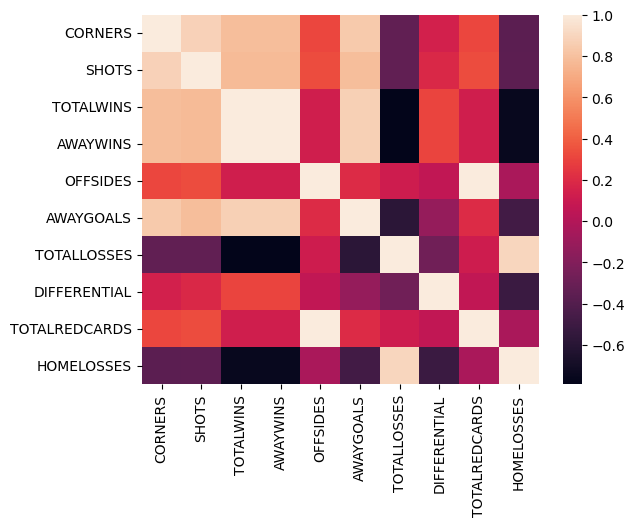

In [207]:
sns.heatmap(SubsetSeasonAverages.corr())

In [208]:
Teams = list(averages_dictLosses.keys())
NumberofAverageLosses = list(averages_dictLosses.values())

NumberofAverageLossesDF = pd.DataFrame({'Teams':Teams,'Number of Average Losses':NumberofAverageLosses})
NumberofAverageLossesDF

fig = px.bar(NumberofAverageLossesDF, x='Teams', y="Number of Average Losses",title = "Average Overall of  Losses")
fig.show()

## Model Prep and Creation

### Logistic Model

In [209]:
CompleteSeasonAverages

,TEAMS,CORNERS,SHOTS,TOTALWINS,AWAYWINS,OFFSIDES,AWAYGOALS,TOTALLOSSES,DIFFERENTIAL,TOTALREDCARDS,HOMELOSSES,WINNERS
0,Charlton,192.857143,189.142857,12.142857,12.142857,3.000000,17.428571,15.857143,8.142857,3.000000,6.571429,0
1,Chelsea,223.842105,250.842105,21.684211,21.684211,2.947368,28.842105,6.421053,9.631579,2.947368,2.000000,5
2,Coventry,206.000000,177.000000,8.000000,8.000000,4.000000,22.000000,20.000000,-8.000000,4.000000,8.000000,0
3,Derby,159.000000,154.000000,6.333333,6.333333,2.000000,11.666667,23.000000,6.666667,2.000000,9.000000,0
4,Leeds,215.500000,213.500000,15.000000,15.000000,3.750000,24.500000,14.500000,4.750000,3.750000,6.250000,0
5,Leicester,180.555556,150.333333,11.555556,11.555556,3.555556,21.444444,13.555556,2.666667,3.555556,4.888889,1
6,Liverpool,233.684211,256.421053,19.736842,19.736842,2.157895,28.526316,7.578947,6.947368,2.157895,2.052632,1
7,Sunderland,182.384615,183.461538,8.846154,8.846154,3.538462,16.307692,19.307692,3.923077,3.538462,7.923077,0
8,Tottenham,213.894737,236.052632,16.894737,16.894737,2.684211,23.947368,11.000000,8.736842,2.684211,3.684211,0
9,Man United,233.210526,260.789474,22.473684,22.473684,2.263158,29.947368,6.526316,7.947368,2.263158,2.263158,7


In [210]:
X = CompleteSeasonAverages.drop(['TEAMS','WINNERS'], axis=1)
y = CompleteSeasonAverages['WINNERS']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000)

In [212]:
y_pred_prob = model.predict_proba(X_test)[:, 1] 

In [213]:
custom_cutoff = 0.7
y_pred = (y_pred_prob >= custom_cutoff).astype(int)

In [214]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[12  0]
 [ 1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.00      0.00      0.00         1

    accuracy                           0.92        13
   macro avg       0.46      0.50      0.48        13
weighted avg       0.85      0.92      0.89        13



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [215]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [216]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [217]:
pipe.score(X_test, y_test) 

0.9230769230769231

# To Be Continued...

### Cross Validation Hyper Parameter Tuning

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
'''
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'model__penalty': ['l1', 'l2'],  # Regularization penalty type
    'model__max_iter': [100, 200, 300], #max iterations
    'model__solver' : ['liblinear','lbfgs']# Maximum number of iterations
}
'''

In [ ]:
'''
n_iter = 100
n_jobs = -1 
scores = ["average_precision", "roc_auc"]
refit = "average_precision" 
random_state = 67
'''

In [ ]:
'''
rscv = RandomizedSearchCV(estimator = pipe, 
                          param_distributions = param_grid, 
                          n_iter = n_iter,
                          n_jobs = n_jobs, 
                          scoring = scores,
                          refit = refit, 
                          random_state = random_state)
'''

In [ ]:
#rscv.fit(X = X_train, y = y_train)

In [ ]:
#rscv.best_params_

In [ ]:
#rscv.best_score_

In [ ]:
'''
cv_results = pd.DataFrame(rscv.cv_results_)[["params",
                                            "mean_test_average_precision",
                                            "rank_test_average_precision",
                                            "mean_test_roc_auc",
                                            "rank_test_roc_auc",
                                            ]]
'''

In [ ]:
#cv_results = cv_results.sort_values("mean_test_average_precision", ascending=False)
#cv_results

In [ ]:
#rscv.best_estimator_[1]

In [ ]:
#y_pred_probatwo = rscvtwo.predict_proba(X_test)[:, -1]

In [ ]:
#metrics.average_precision_score(y_test, y_pred_probatwo)

In [ ]:
#metrics.roc_auc_score(y_test, y_pred_probatwo)

In [ ]:
#metrics.PrecisionRecallDisplay.from_predictions(y_test, y_pred_probatwo, name="Logistic Regression Model")
#plt.show()

In [ ]:
#precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_probatwo)

In [ ]:
#target_precision = 0.85

In [ ]:
'''
for i in range(len(precision)):
    if precision[i] >= target_precision:
        print(i)
        break
'''

In [ ]:
#print(precision[i], recall[i], thresholds[i])

## Dash Component